Imports

In [1]:
import numpy as np
from sklearn.linear_model import LassoCV, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

Define auxiliary function to calculate sum of squared errors

In [2]:
def sum_squared_errors(estimator, X, y):
    return np.mean((np.reshape(estimator.predict(X), (y.shape)) - y) ** 2)

Load data

In [3]:
data_x = np.load('Xtrain_Regression2.npy')
data_y = np.load('Ytrain_Regression2.npy')

Fit a linear regression model using all the data

In [4]:
folds = 10

lasso = LassoCV(cv=folds).fit(data_x, data_y.ravel())

lasso_cv_score = cross_val_score(lasso, data_x, data_y.ravel(), cv=folds, scoring='r2')

print("Lasso score: %f" % lasso_cv_score.mean())
print("Lasso sum of squared errors: %f" % sum_squared_errors(lasso, data_x, data_y.ravel()))

Lasso score: 0.005225
Lasso sum of squared errors: 580.744424


### Robust regression models

Huber Regressor

Number of inliers found: 60
Huber regressor score: 0.997851
Huber regressor sum of squared errors: -0.005988
Number of inliers found: 63
Huber regressor score: 0.996917
Huber regressor sum of squared errors: -0.006103
Number of inliers found: 63
Huber regressor score: 0.996920
Huber regressor sum of squared errors: -0.006096
Number of inliers found: 66
Huber regressor score: 0.996471
Huber regressor sum of squared errors: -0.007148
Number of inliers found: 66
Huber regressor score: 0.996480
Huber regressor sum of squared errors: -0.007122
Number of inliers found: 66
Huber regressor score: 0.996488
Huber regressor sum of squared errors: -0.007097
Number of inliers found: 66
Huber regressor score: 0.996494
Huber regressor sum of squared errors: -0.007078
Number of inliers found: 67
Huber regressor score: 0.996760
Huber regressor sum of squared errors: -0.007363
Number of inliers found: 69
Huber regressor score: 0.996865
Huber regressor sum of squared errors: -0.008615
Number of inliers f

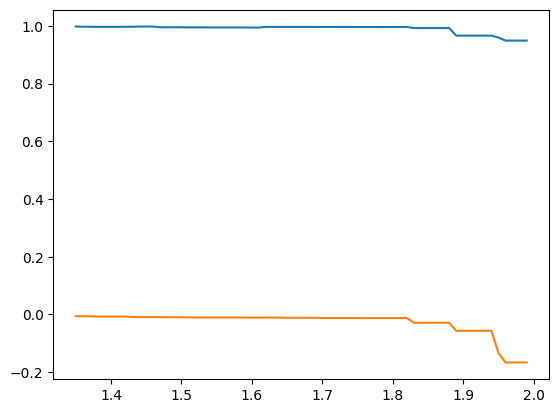

Best epsilon for Huber regressor: 1.740000
Best mse for Huber regressor: -0.011965
Best score for Huber regressor: 0.996223
Huber regressor SSE: 1.929065
Number of inliers found: -22


In [23]:
i=0
huber_cv_r2 = np.zeros(int((2 - 1.35) / 0.01) + 1)
huber_cv_mse = np.zeros(int((2 - 1.35) / 0.01) + 1)
best_mse = -1000
best_score = 0

for epsilon in np.arange(1.35, 2, 0.01):
    huber = HuberRegressor(epsilon=epsilon).fit(data_x, data_y.ravel())
    huber_cv_r2[i] = cross_val_score(huber, data_x[~huber.outliers_], data_y.ravel()[~huber.outliers_], cv=folds, scoring='r2').mean()
    huber_cv_mse[i] = cross_val_score(huber, data_x[~huber.outliers_], data_y.ravel()[~huber.outliers_], cv=folds, scoring='neg_mean_squared_error').mean()
    print("Number of inliers found: %d" % (~huber.outliers_).sum())
    print("Huber regressor score: %f" % huber_cv_r2[i])
    print("Huber regressor sum of squared errors: %f" % huber_cv_mse[i])
    if (huber_cv_mse[i] > best_mse and (~huber.outliers_).sum() >= 79):
        best_mse = huber_cv_mse[i]
        best_score = huber_cv_r2[i]
        best_epsilon = epsilon
    i = i+1

plt.plot(np.arange(1.35, 2, 0.01), huber_cv_r2)
plt.plot(np.arange(1.35, 2, 0.01), huber_cv_mse)
plt.show()

print("Best epsilon for Huber regressor: %f" % best_epsilon)
print("Best mse for Huber regressor: %f" % best_mse)
print("Best score for Huber regressor: %f" % best_score)

huber = HuberRegressor(epsilon=best_epsilon).fit(data_x, data_y.ravel())

print("Huber regressor SSE: %f" % sum_squared_errors(huber, data_x[~huber.outliers_], data_y.ravel()[~huber.outliers_]))
print("Number of inliers found: %d" % ~huber.outliers_.sum())

Ransac regression

In [12]:
ransac = GridSearchCV(RANSACRegressor(random_state=0), {'residual_threshold': np.arange(0.5, 1.0, 0.01)}, cv=folds, scoring='neg_mean_squared_error', verbose=4, n_jobs=4)

ransac.fit(data_x, data_y.ravel())

print("Number of inliers found: %d" % np.sum(ransac.best_estimator_.inlier_mask_))
print("RANSAC best parameters: %s" % ransac.best_params_)
print("RANSAC score: %f" % ransac.best_score_)
print("RANSAC sum of squared errors: %f" % sum_squared_errors(ransac.best_estimator_, data_x[ransac.best_estimator_.inlier_mask_], data_y.ravel()[ransac.best_estimator_.inlier_mask_]))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Number of inliers found: 81
RANSAC best parameters: {'residual_threshold': 0.9800000000000004}
RANSAC score: -7.700799
RANSAC sum of squared errors: 1.820710


Number of inliers found: 83
Ransac regressor score: 1.038422
Ransac regressor sum of squared errors: 7.834584


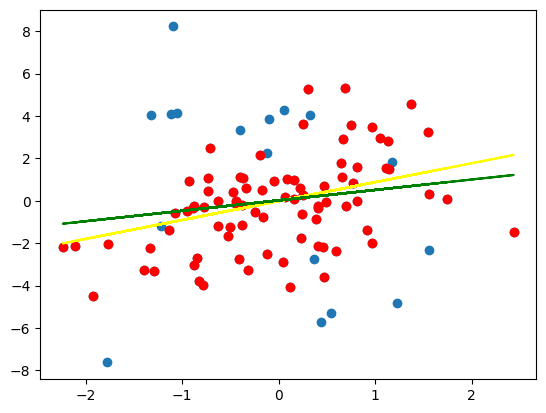

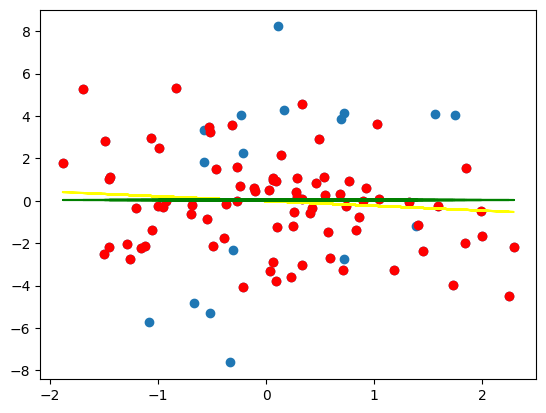

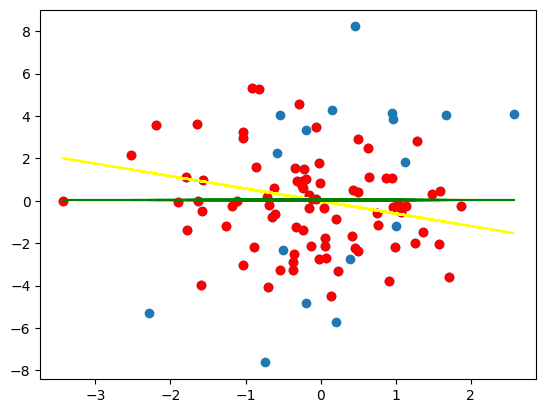

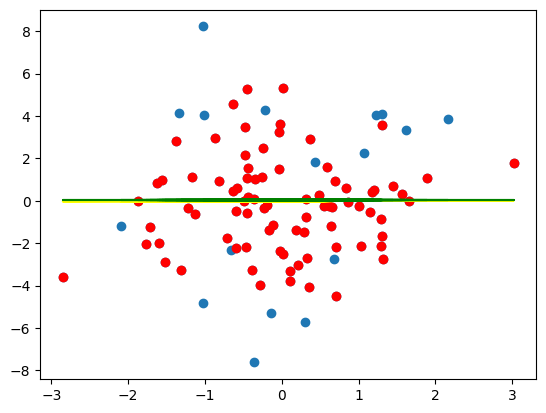

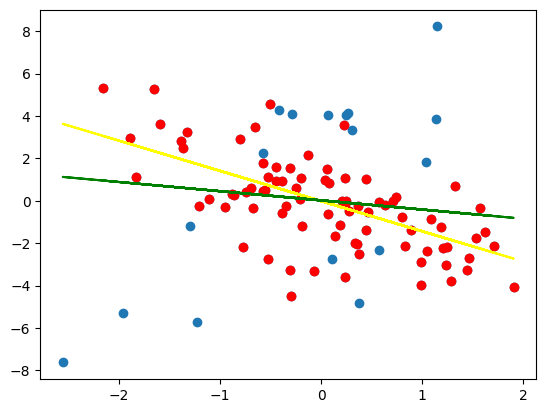

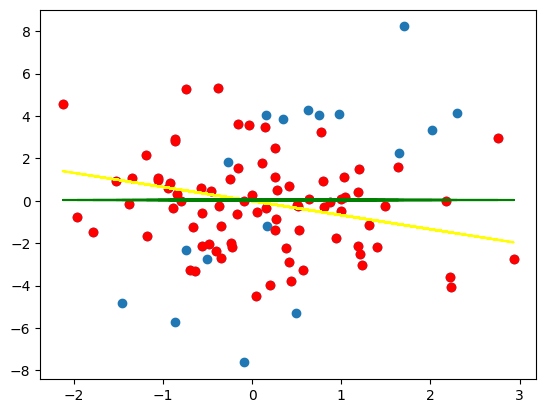

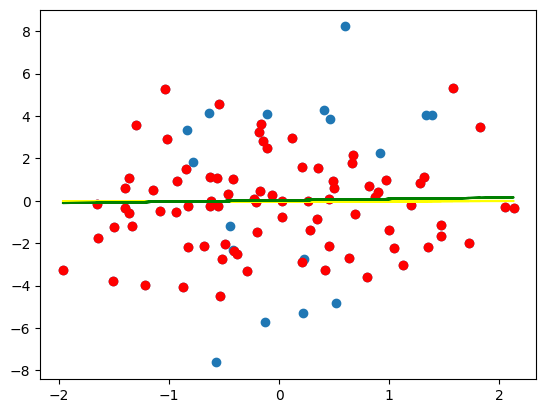

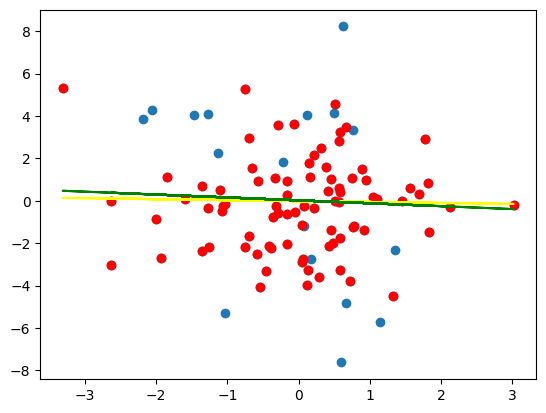

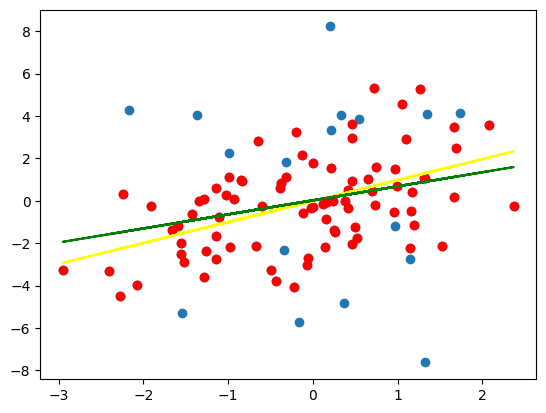

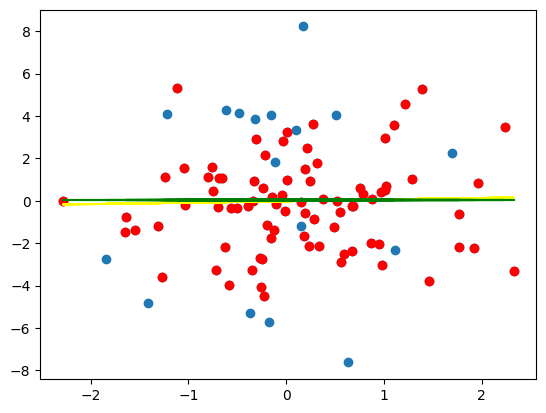

In [27]:
ransac = RANSACRegressor().fit(data_x, data_y.ravel())

cv_score = cross_val_score(ransac, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_], cv=folds, scoring=sum_squared_errors)

print("Number of inliers found: %d" % ransac.inlier_mask_.sum())

print("Ransac regressor score: %f" % cv_score.mean())
print("Ransac regressor sum of squared errors: %f" % sum_squared_errors(ransac, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_]))

for feature in range(10):
    plt.figure(feature)
    plt.scatter(data_x[:,feature], data_y)  
    plt.scatter(data_x[ransac.inlier_mask_, feature], data_y[ransac.inlier_mask_], color='red')
    plt.plot(data_x[:, feature], data_x[:, feature] * ransac.estimator_.coef_[feature] + ransac.estimator_.intercept_, color='yellow')
    plt.plot(data_x[:, feature], data_x[:, feature] * lasso.coef_[feature] + lasso.intercept_, color='green')
    plt.show()

Theilsen regressor score: 0.024525
Theilsen regressor sum of squared errors: -6.997175
Theilsen regressor score: 0.018182
Theilsen regressor sum of squared errors: -6.938270
Theilsen regressor score: 0.011698
Theilsen regressor sum of squared errors: -6.910306
Theilsen regressor score: 0.004269
Theilsen regressor sum of squared errors: -6.916201
Theilsen regressor score: -0.001319
Theilsen regressor sum of squared errors: -6.919251
Theilsen regressor score: -0.007619
Theilsen regressor sum of squared errors: -6.938946
Theilsen regressor score: -0.010069
Theilsen regressor sum of squared errors: -6.941645
Theilsen regressor score: -0.011984
Theilsen regressor sum of squared errors: -6.941280
Theilsen regressor score: -0.015230
Theilsen regressor sum of squared errors: -6.950164
Theilsen regressor score: -0.017404
Theilsen regressor sum of squared errors: -6.956376
Theilsen regressor score: -0.019226
Theilsen regressor sum of squared errors: -6.963580
Theilsen regressor score: -0.020618


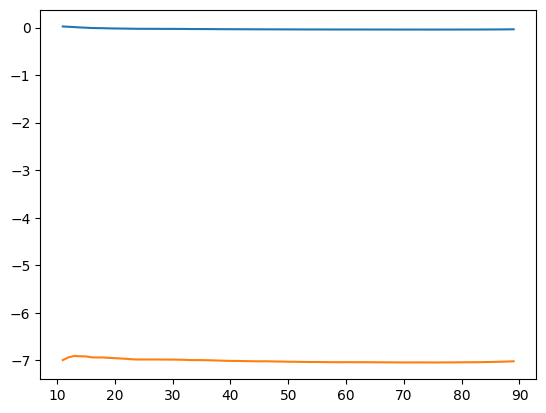

Best n_subsamples for TheilSen regressor: 13.000000
Best mse for TheilSen regressor: -6.910306
Best score for TheilSen regressor: 0.011698
TheilSen regressor SSE: 580.261363


AttributeError: 'TheilSenRegressor' object has no attribute 'outliers_'

In [34]:
theilsen_cv_r2 = np.zeros(90 - 11)
theilsen_cv_mse = np.zeros(90 - 11)
best_mse = -1000
best_score = 0
i=0

for n_subsamples in np.arange(11, 90, 1):
    theilsen = TheilSenRegressor(n_subsamples=n_subsamples, random_state=0, n_jobs=8).fit(data_x, data_y.ravel())
    theilsen_cv_r2[i] = cross_val_score(theilsen, data_x, data_y.ravel(), cv=folds, scoring='r2').mean()
    theilsen_cv_mse[i] = cross_val_score(theilsen, data_x, data_y.ravel(), cv=folds, scoring='neg_mean_squared_error').mean()
    print("Theilsen regressor score: %f" % theilsen_cv_r2[i])
    print("Theilsen regressor sum of squared errors: %f" % theilsen_cv_mse[i])
    if (theilsen_cv_mse[i] > best_mse):
        best_mse = theilsen_cv_mse[i]
        best_score = theilsen_cv_r2[i]
        best_n_subsamples = n_subsamples
    i = i+1

plt.plot(np.arange(11, 90, 1), theilsen_cv_r2)
plt.plot(np.arange(11, 90, 1), theilsen_cv_mse)
plt.show()

print("Best n_subsamples for TheilSen regressor: %f" % best_n_subsamples)
print("Best mse for TheilSen regressor: %f" % best_mse)
print("Best score for TheilSen regressor: %f" % best_score)

theilsen = TheilSenRegressor(n_subsamples=best_n_subsamples).fit(data_x, data_y.ravel())

print("TheilSen regressor SSE: %f" % sum_squared_errors(theilsen, data_x, data_y.ravel()))
